In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
df = pd.read_csv('depression_data.csv')
depression_df = df.copy(1)
del depression_df['Name']

In [4]:
depression_df['DepressionValue'] = depression_df.apply(returnSum, axis=1)

In [5]:
depression_df.describe()

,Age,Number of Children,Income,DepressionValue
count,413768.000000,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971,5.010510
std,18.158759,1.237054,40624.100565,1.247869
min,18.000000,0.000000,0.410000,0.772015
25%,33.000000,0.000000,21001.030000,4.125665
50%,49.000000,1.000000,37520.135000,4.963419
75%,65.000000,2.000000,76616.300000,5.842497
max,80.000000,4.000000,209995.220000,11.326034


In [6]:
depression_df.to_csv('data.csv')

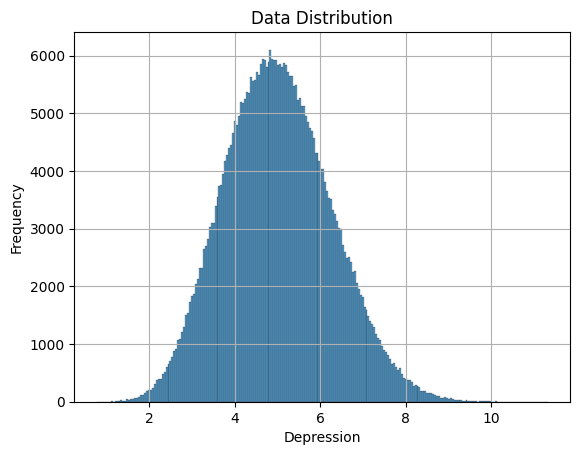

In [7]:
import seaborn as sns

sns.histplot(depression_df['DepressionValue'])
plt.title('Data Distribution')
plt.xlabel('Depression')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
# 0-4 -- Chilled people
# 4-6 -- Normal
# 6-8 -- Moderate / toward depression
# 8-above -- High risk / Depression

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [30]:
model_df = pd.read_csv('dataupdated.csv')
df_encoded = pd.get_dummies(model_df, columns=['Marital Status', 'Education Level', 'Smoking Status', 'Physical Activity Level', 'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions'], prefix_sep='_')
X = df_encoded.drop('DepressionValue', axis=1)  # Assuming 'DepressionValue' is the target variable
y = df_encoded['DepressionValue']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate model (e.g., using Mean Squared Error)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}")


Decision Tree MSE: 0.8821065440301118


In [32]:
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate model (e.g., using Mean Squared Error)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


Random Forest MSE: 0.4754751714755083


In [33]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
print("MAE RF : ", mae)
print("MAPE RF : ", mape)

MAE RF :  0.5543692406754875
MAPE RF :  0.1208745596707831


In [26]:
rf_regressor.score(X,y)

0.9049227881434723

In [51]:
# Predict using the trained Random Forest model
import numpy as np

# Assuming X_test is your 1D array of features for prediction
X_test = np.array([31, 2, 26265.67, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])

# Reshape X_test into a 2D array with one row and multiple columns
X_test_reshaped = X_test.reshape(1, -1)

# Predict using the trained Random Forest model
predictions = rf_regressor.predict(X_test_reshaped)

print("Predictions:", predictions)


c:\Users\Sunil Magare\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predictions: [6.86479454]


In [53]:
import pickle
pickle.dump(rf_regressor, open('randomforestmodel', 'wb'))

In [54]:
model = pickle.load(open('randomforestmodel', 'rb'))

In [55]:
predictions = model.predict(X_test_reshaped)

print("Predictions:", predictions)

c:\Users\Sunil Magare\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predictions: [6.86479454]
